In [ ]:
import Pkg

Pkg.activate(".")

using Agents
using Distributions
using Random
using Statistics
using Printf
using ColorTypes
using StatsBase
using DataFrames
using Clustering
using RollingFunctions
using Graphs
using AgentsPlots
using CairoMakie
using Logging


include("agents.jl")
include("utils.jl")
include("model.jl")

# Model initialization
Low- and high-income agents are randomly spread across the grid.

In [ ]:

current_seed = 580 

model = initialize_model(
    seed = current_seed
)
#=
plot_potential_rent(model)
city_plot(model)
city_plot_rent(model)
=#



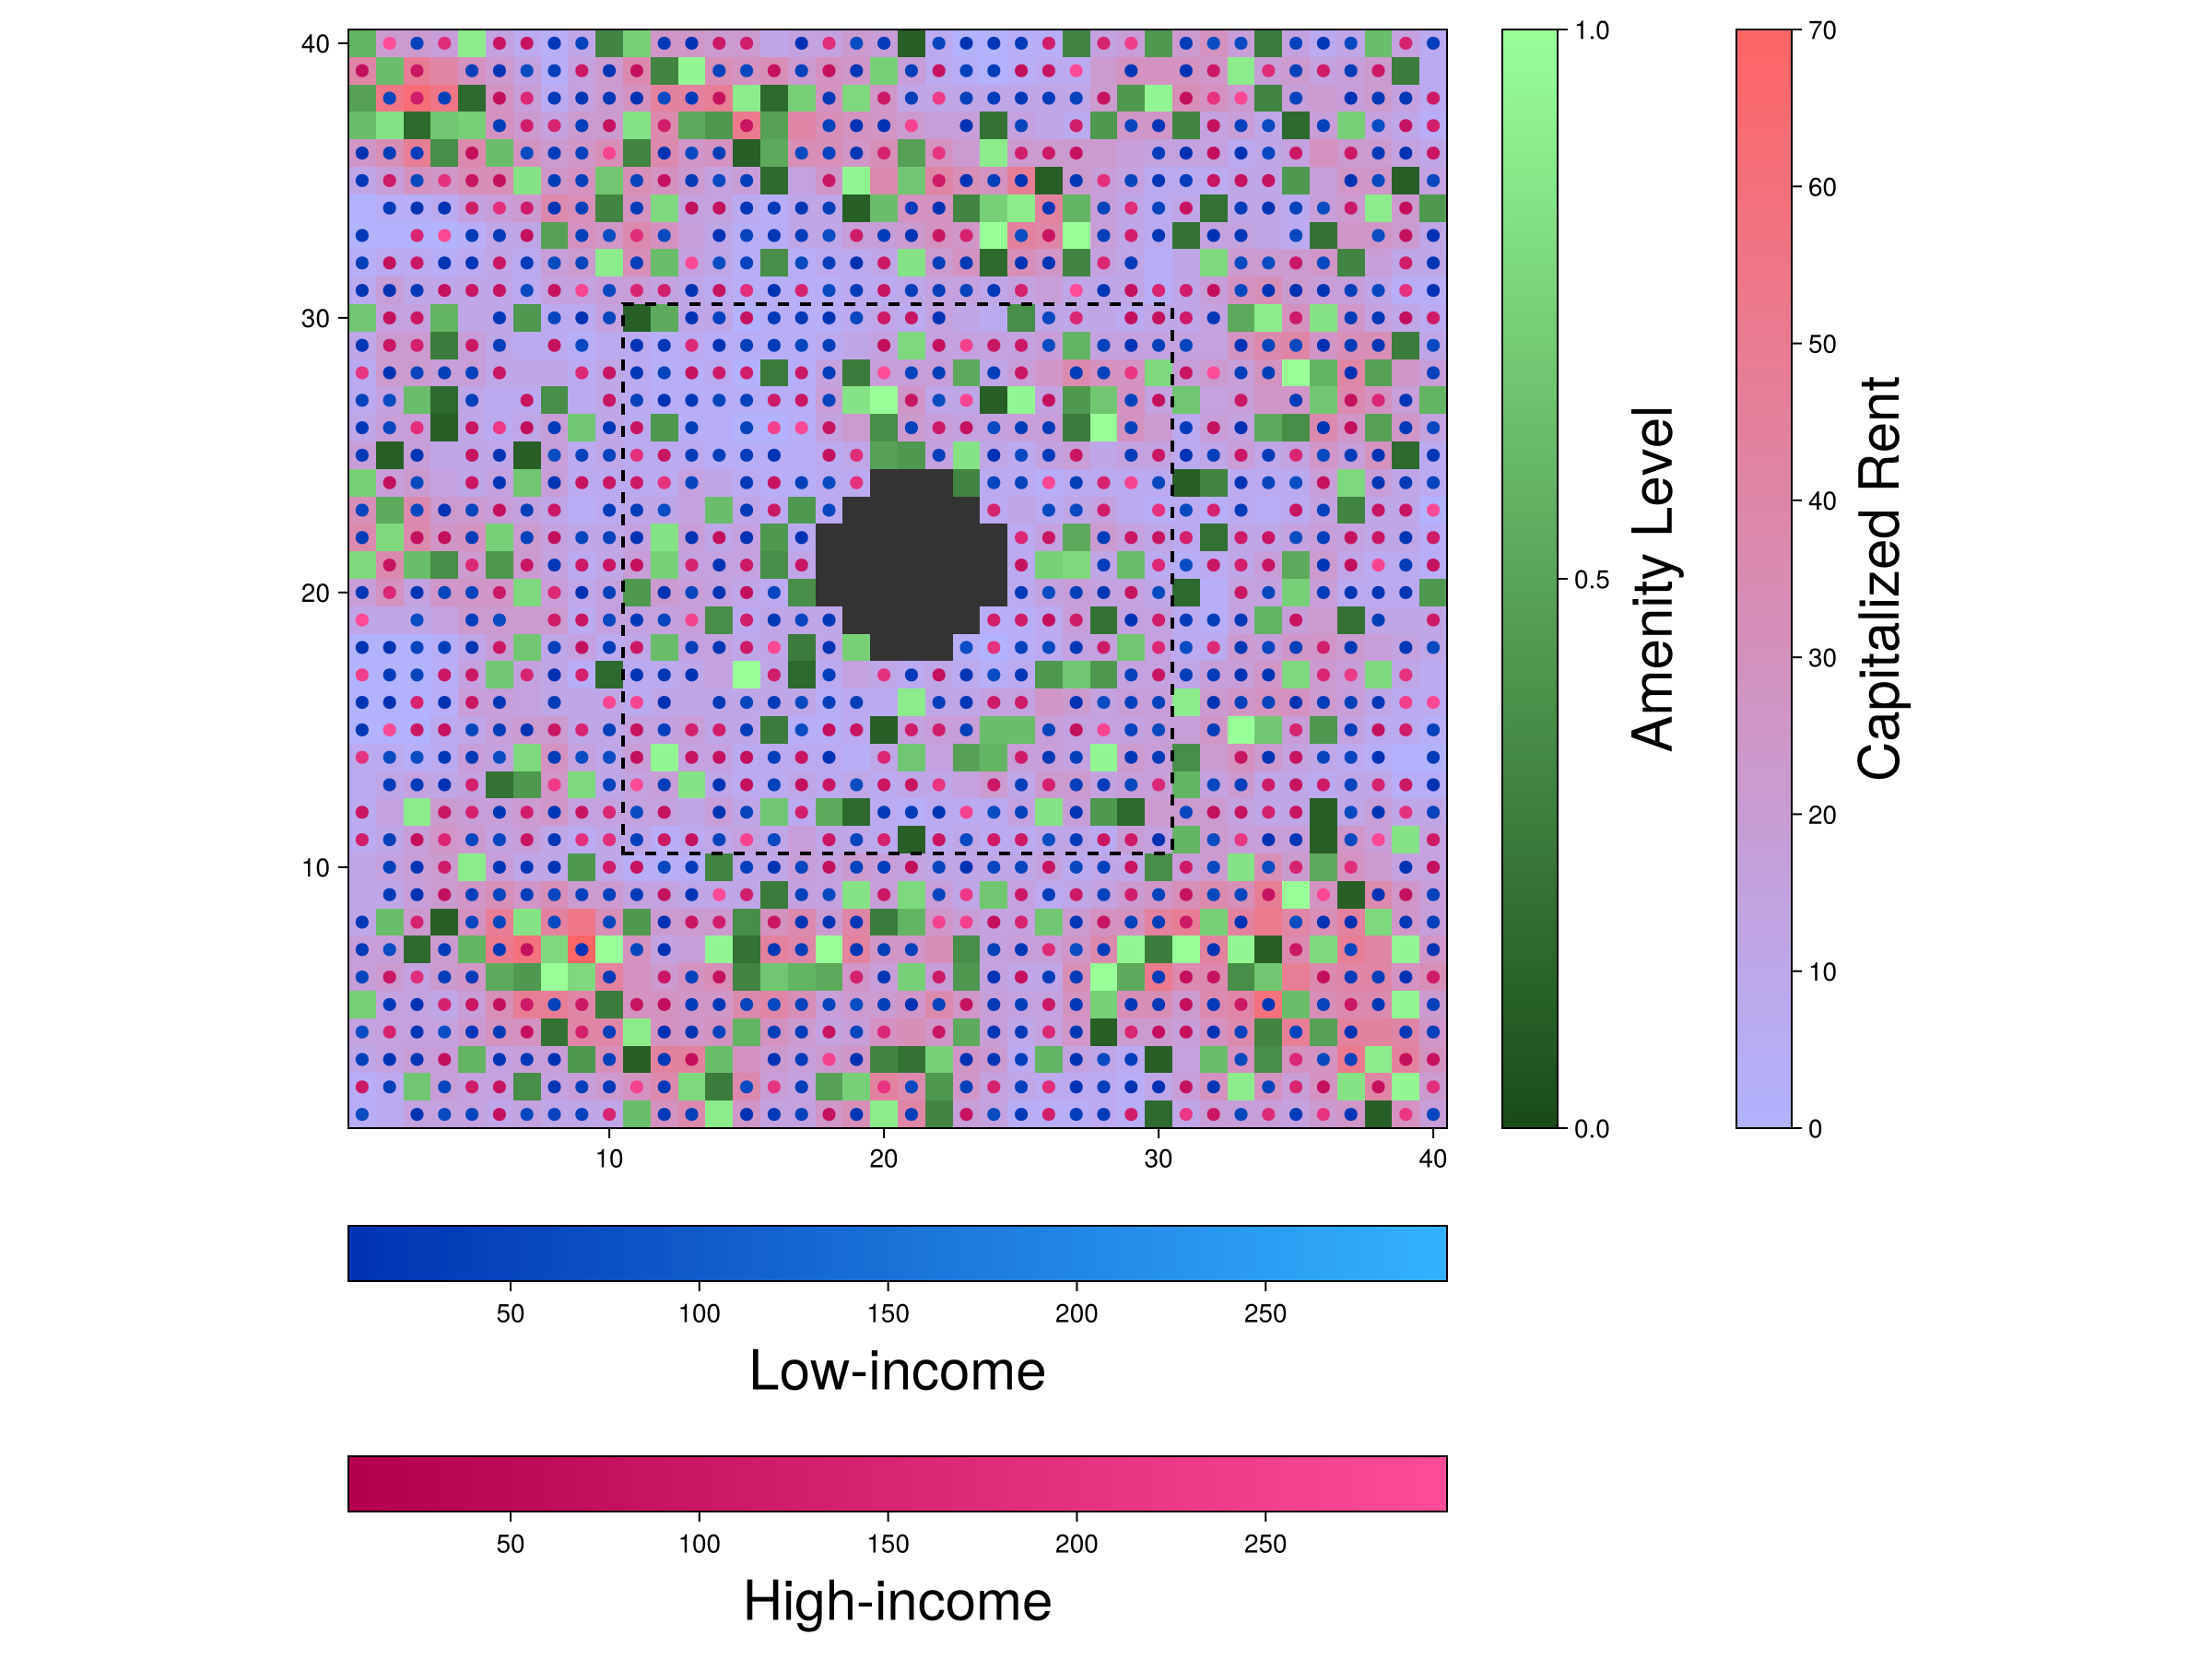

Visualizzazione ABM con heatmap affitti e colorbar generata.


In [22]:

with_logger(NullLogger()) do
    city_plot_rent(model)
end

# Thermalization
Agents are free to move according to their utility functions, which depend on the difference between their income and the rent of the patch they occupy, the surrounding amenities, the age of the house, and the distance from the CBD.
As a result, the city reaches a more realistic, segregated configuration.

In [23]:

n_thermalization_steps = 15 

for i in 1:n_thermalization_steps
    step!(model, agent_step!, model_step_termalizzazione!, 1)
    
end

#city_plot(model)
#city_plot_rent(model)




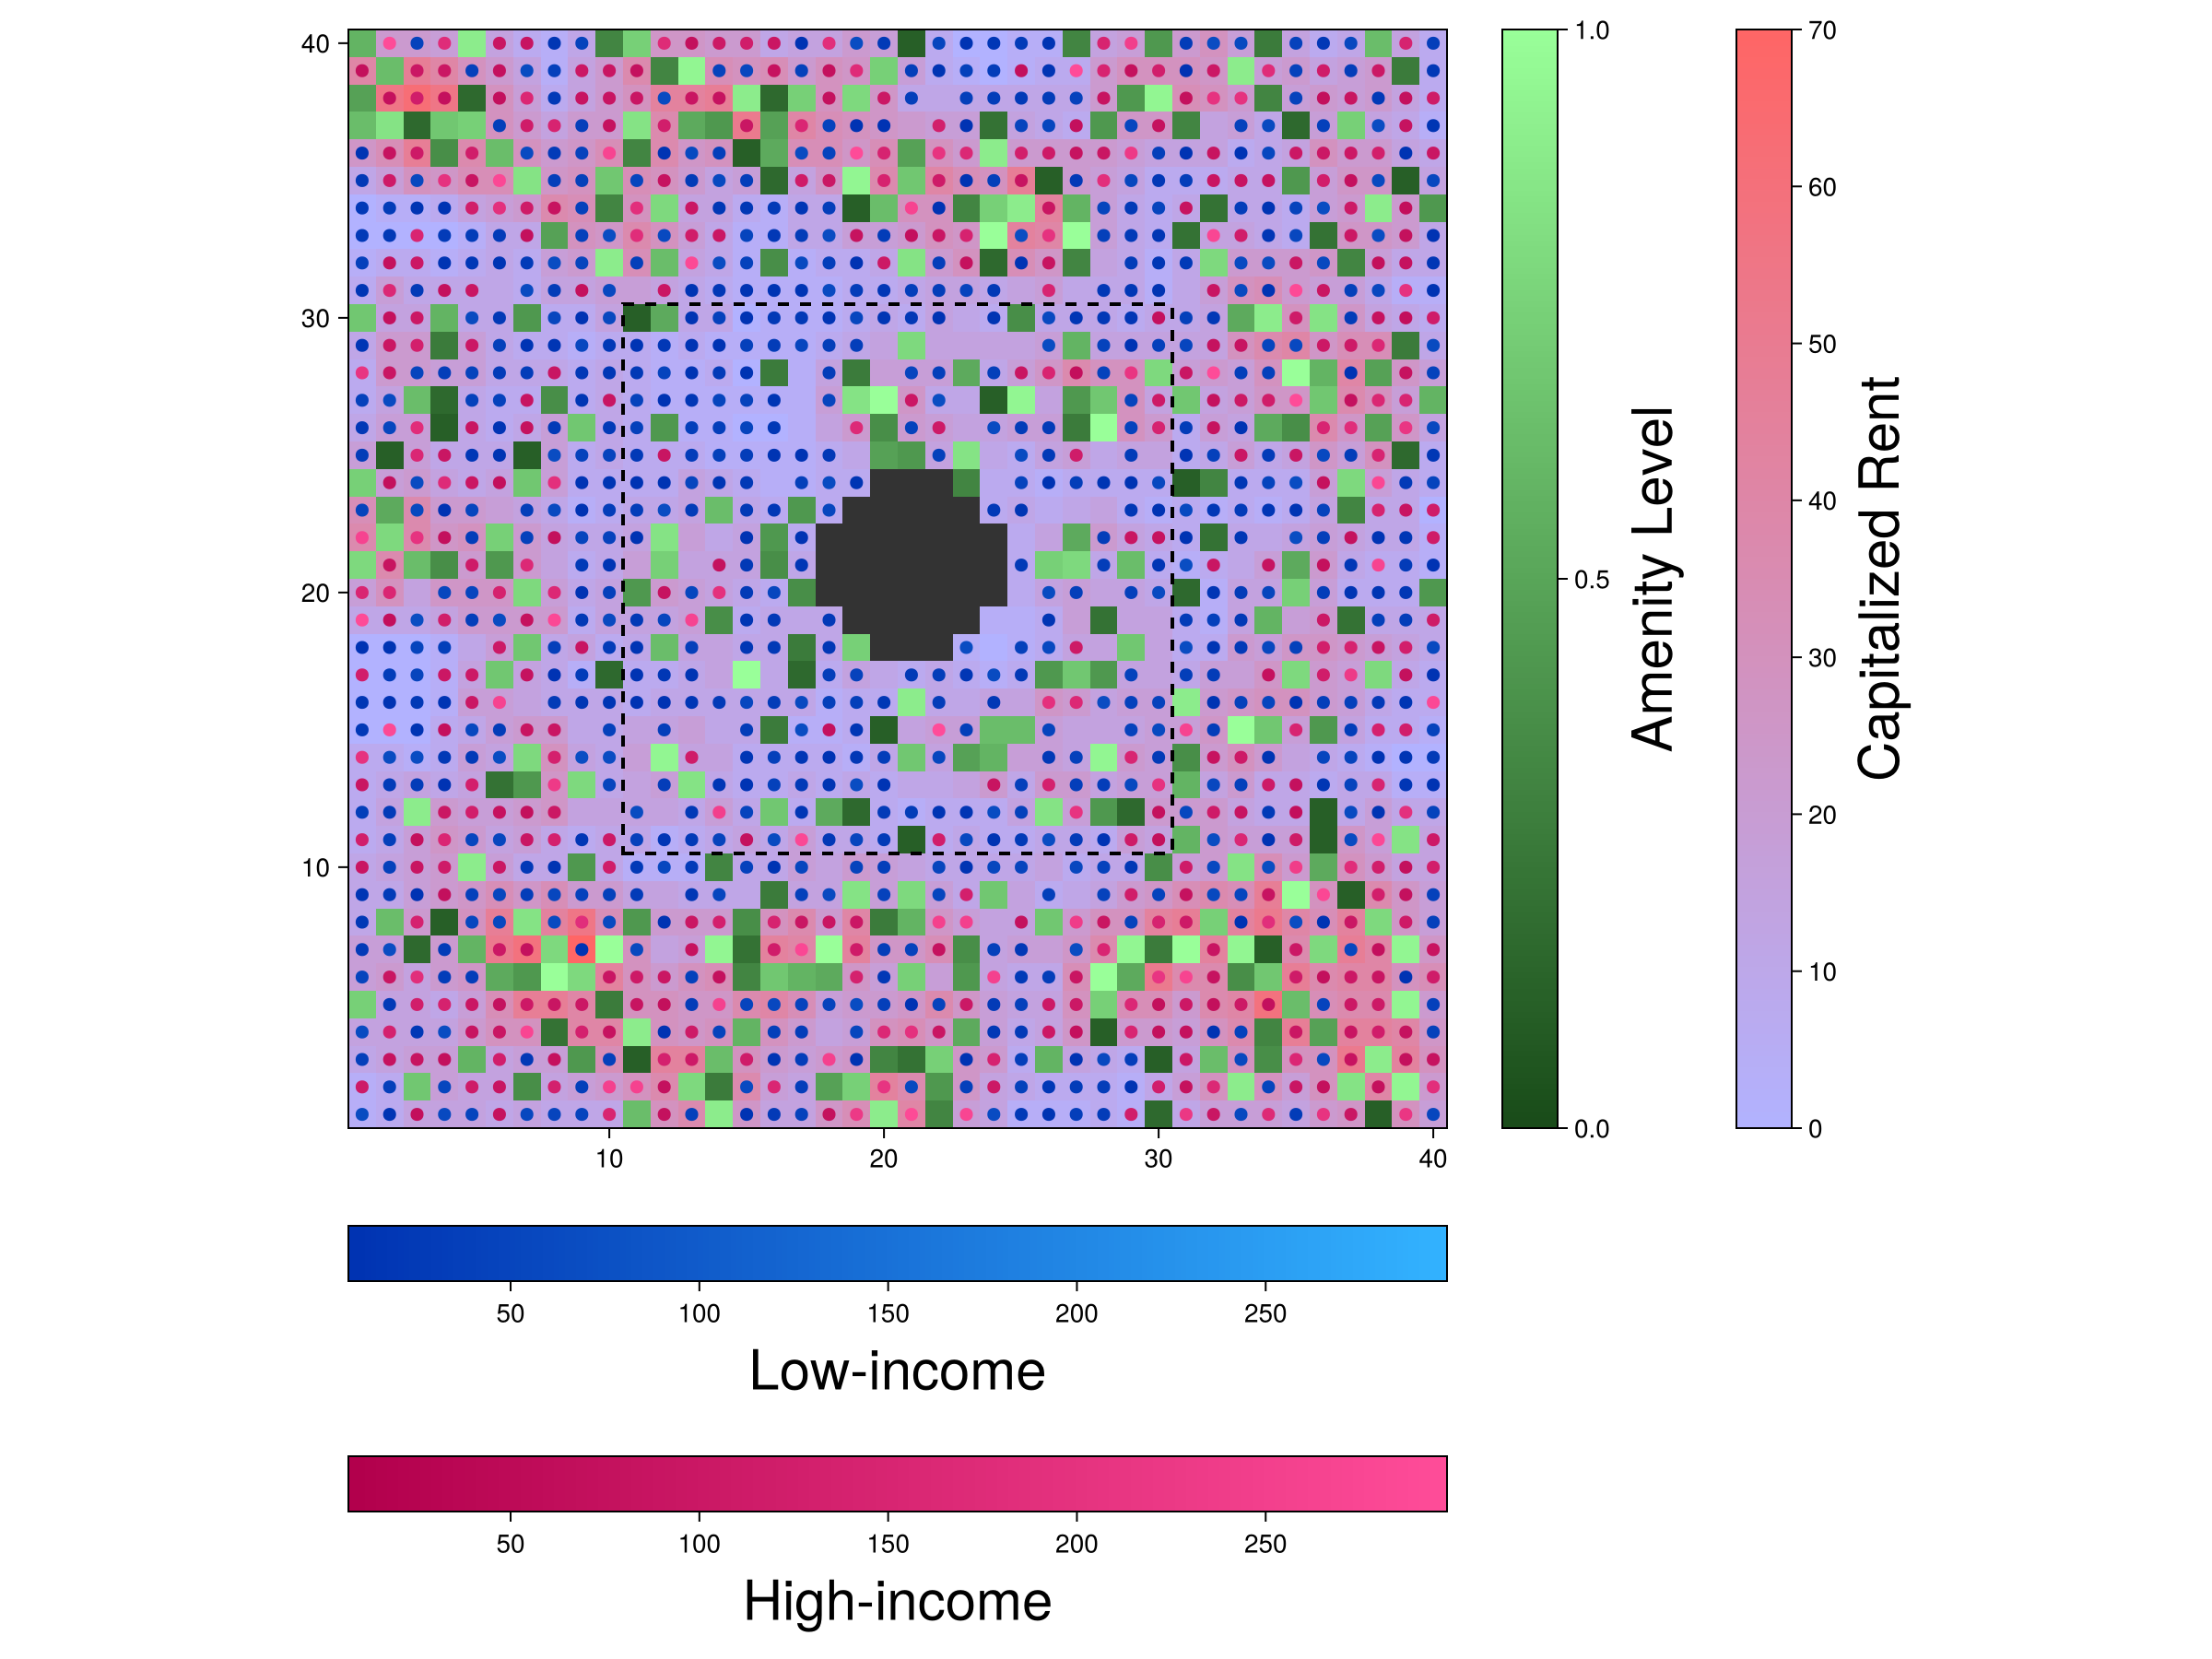

Visualizzazione ABM con heatmap affitti e colorbar generata.


In [24]:
with_logger(NullLogger()) do
    city_plot_rent(model)
end

# Dynamics
Now the gentrification dynamics begin: at each step, some of the housing patches with the highest rent-gap are renovated — reducing their age — in order to attract high-income agents.

# No public housing intervention

In [ ]:

current_sim_seed = 580
current_PH_fraction = 0.07

n_steps_termalizzazione = 15

initial_model = initialize_model(; seed = current_sim_seed, public_housing_fraction =  current_PH_fraction)

agent_df_term, model_metrics_df_term, quadrant_df_term, thermalized_model_object =
    run_simulation_phase_and_collect_data(
        initial_model,
        n_steps_termalizzazione,
        agent_step!,
        model_step_termalizzazione!, 
        0
    )

model_free = deepcopy(thermalized_model_object)

n_steps_dinamici = 111


agent_df_free, model_metrics_df_free, quadrant_df_free, final_model_free =
    run_simulation_phase_and_collect_data(
        model_free,
        n_steps_dinamici,
        agent_step!,
        model_step_dinamica_free!,
        n_steps_termalizzazione
    )


combined_model_metrics_df_free = vcat(model_metrics_df_term, model_metrics_df_free[2:end,:])
combined_quadrant_df_free = vcat(quadrant_df_term, quadrant_df_free[2:end,:])


#plot_single_city_comparison_simple(thermalized_model_object, final_model_free, :age)
#plot_single_city_comparison_simple(thermalized_model_object, final_model_free, :cap_rent)
#plot_single_city_comparison_simple(thermalized_model_object, final_model_free, :pot_rent)


#plot_income_trends_inner_city(combined_model_metrics_df_free);




In [13]:
plot_single_city_comparison_simple(thermalized_model_object, final_model_free, :cap_rent)


Generazione plot di confronto per: Capitalized Rent...


# Public housing intervention
When the inner-city median rent grows over the 50% of its initial value a fraction of housing patches are transformed into public.

# Random Selection
The units to be made public are selected randomly among the available.

In [ ]:
model_ph_random = deepcopy(thermalized_model_object)


agent_df_ph_random, model_metrics_df_ph_random, quadrant_df_ph_random, final_model_random =
    run_simulation_phase_and_collect_data(
        model_ph_random,
        n_steps_dinamici,
        agent_step!,
        model_step_dinamica_public_random!, 
        n_steps_termalizzazione,
        "Dinamica PH Random"
    )


combined_model_metrics_df_ph_random = vcat(model_metrics_df_term, model_metrics_df_ph_random[2:end,:])
combined_quadrant_df_ph_random = vcat(quadrant_df_term, quadrant_df_ph_random[2:end,:])
#=
plot_single_city_comparison_simple(thermalized_model_object, final_model_random, :age)
plot_single_city_comparison_simple(thermalized_model_object, final_model_random, :cap_rent)
plot_single_city_comparison_simple(thermalized_model_object, final_model_random, :pot_rent)



plot_income_trends_inner_city(combined_model_metrics_df_ph_random)
=#

Generazione plot di confronto per: Capitalized Rent...


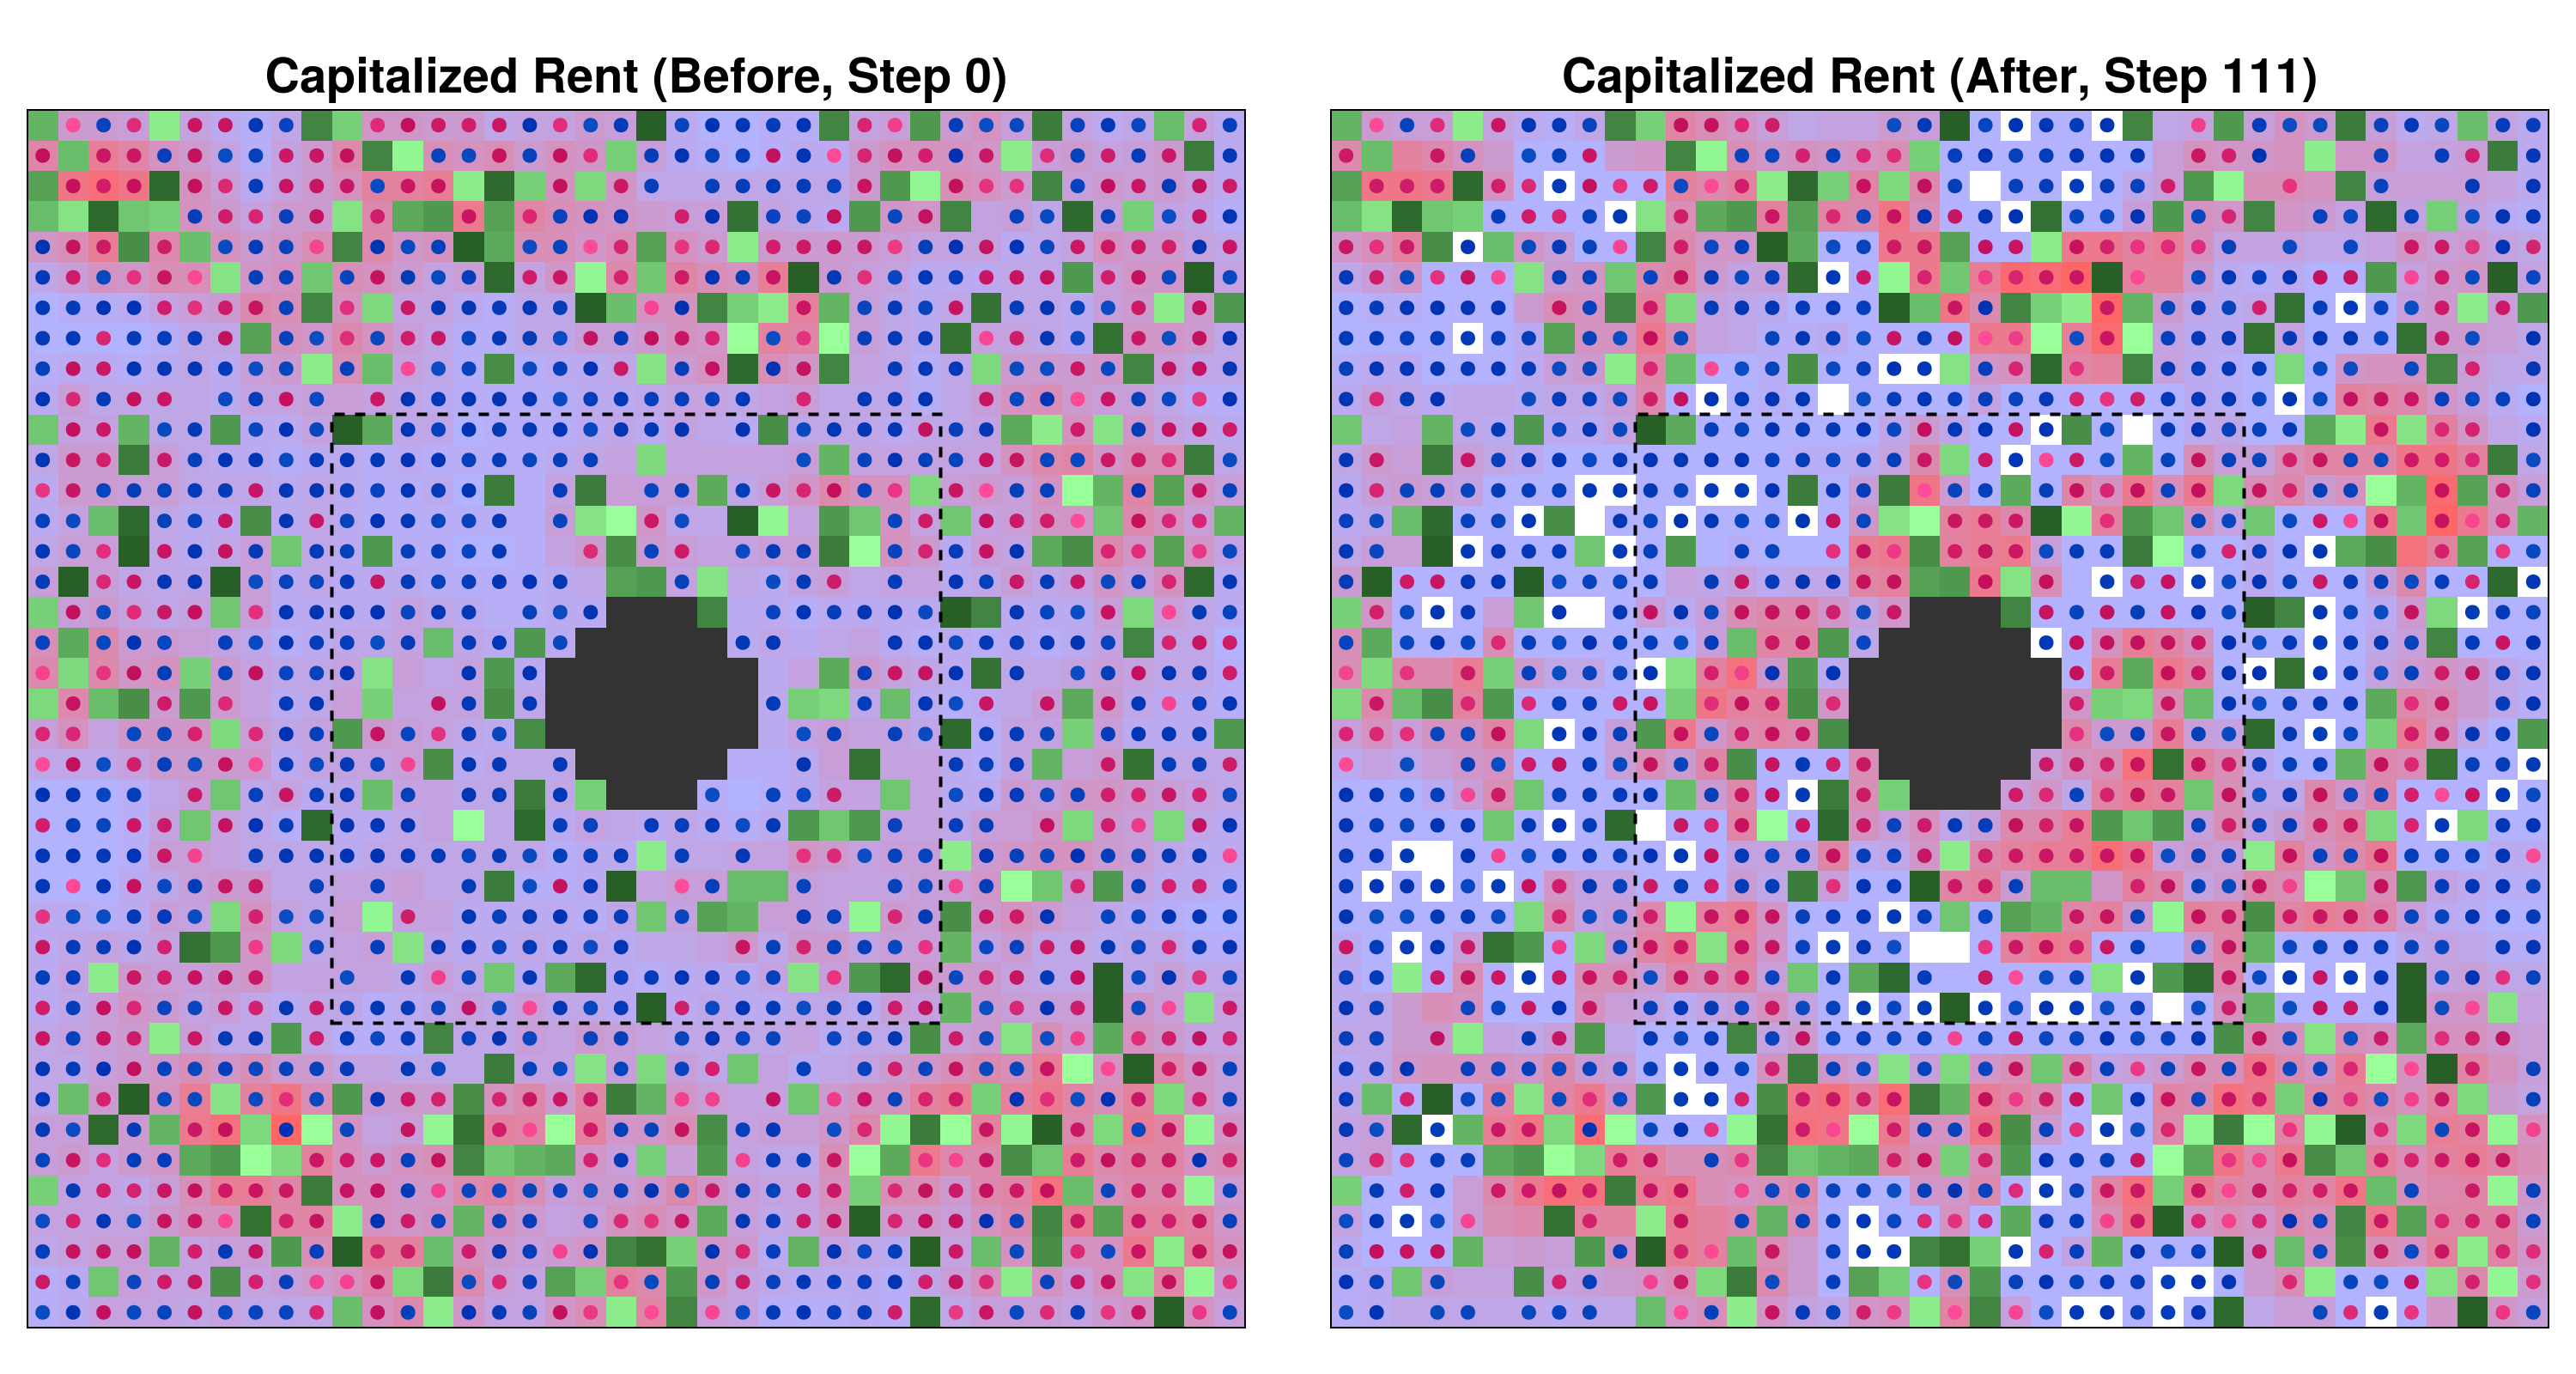

In [16]:
plot_single_city_comparison_simple(thermalized_model_object, final_model_random, :cap_rent)

# Rent-Gap Selection
The units to be made public are selected according to their rent-gap among the available.

In [ ]:
model_ph_rentgap = deepcopy(thermalized_model_object)

agent_df_ph_rentgap, model_metrics_df_ph_rentgap, quadrant_df_ph_rentgap, final_model_rentgap =
    run_simulation_phase_and_collect_data(
        model_ph_rentgap,
        n_steps_dinamici,
        agent_step!,
        model_step_dinamica_public_rent_gap!, 
        n_steps_termalizzazione,
        "Dinamica PH Rent-Gap"
    )


combined_model_metrics_df_ph_rentgap = vcat(model_metrics_df_term, model_metrics_df_ph_rentgap[2:end,:])
combined_quadrant_df_ph_rentgap = vcat(quadrant_df_term, quadrant_df_ph_rentgap[2:end,:])
#=
    
plot_single_city_comparison_simple(thermalized_model_object, final_model_rentgap, :age)
plot_single_city_comparison_simple(thermalized_model_object, final_model_rentgap, :cap_rent)
plot_single_city_comparison_simple(thermalized_model_object, final_model_rentgap, :pot_rent)



plot_income_trends_inner_city(combined_model_metrics_df_ph_rentgap)
=#

In [18]:
plot_single_city_comparison_simple(thermalized_model_object, final_model_rentgap, :cap_rent)


Generazione plot di confronto per: Capitalized Rent...


# Comparison between different scenarios

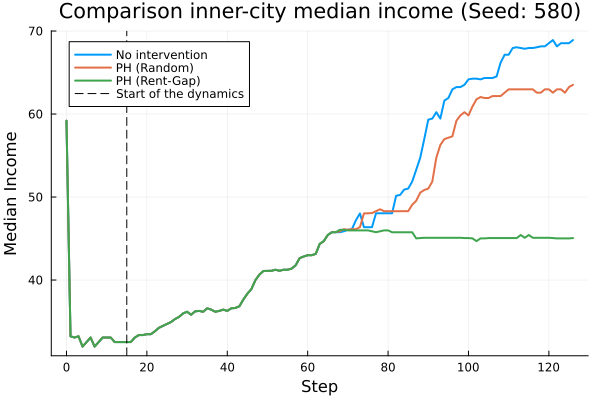

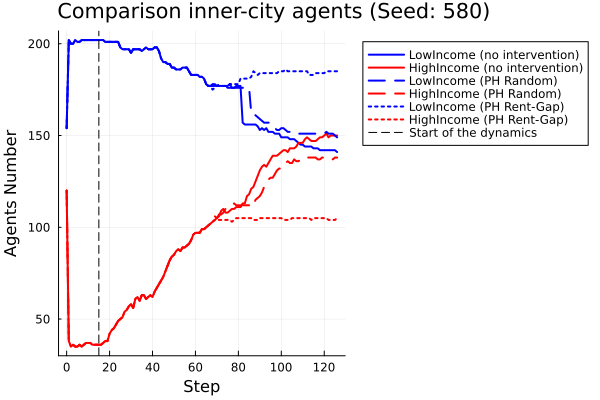

In [28]:


    plot_title_income = "Comparison inner-city median income (Seed: $current_sim_seed)"
    p_income = Plots.plot(combined_model_metrics_df_free.step, combined_model_metrics_df_free.median_income_inner_city,
        label="No intervention", title=plot_title_income, xlabel="Step", ylabel="Median Income", legend=:topleft, linewidth=2)
    Plots.plot!(p_income, combined_model_metrics_df_ph_random.step, combined_model_metrics_df_ph_random.median_income_inner_city,
        label="PH (Random)", linewidth=2)
    Plots.plot!(p_income, combined_model_metrics_df_ph_rentgap.step, combined_model_metrics_df_ph_rentgap.median_income_inner_city,
        label="PH (Rent-Gap)", linewidth=2)
    Plots.vline!(p_income, [n_steps_termalizzazione], label="Start of the dynamics", color=:black, linestyle=:dash)
    display(p_income)

    plot_title_agents = "Comparison inner-city agents (Seed: $current_sim_seed)"
    col_low_inner = :n_low_inner
    col_high_inner = :n_high_inner
    
    
    p_agents = Plots.plot(combined_model_metrics_df_free.step, combined_model_metrics_df_free[!, col_low_inner],
        label="LowIncome (no intervention)", title=plot_title_agents,titlelocation = :left, xlabel="Step", ylabel="Agents Number",
        color=:blue, line=:solid, linewidth=2, legend=:outertopright)
    
    
    Plots.plot!(p_agents, combined_model_metrics_df_free.step, combined_model_metrics_df_free[!, col_high_inner],
        label="HighIncome (no intervention)", color=:red, line=:solid, linewidth=2)
    
    Plots.plot!(p_agents, combined_model_metrics_df_ph_random.step, combined_model_metrics_df_ph_random[!, col_low_inner],
        label="LowIncome (PH Random)", color=:blue, line=:dash, linewidth=2)
    Plots.plot!(p_agents, combined_model_metrics_df_ph_random.step, combined_model_metrics_df_ph_random[!, col_high_inner],
        label="HighIncome (PH Random)", color=:red, line=:dash, linewidth=2)
        
    Plots.plot!(p_agents, combined_model_metrics_df_ph_rentgap.step, combined_model_metrics_df_ph_rentgap[!, col_low_inner],
        label="LowIncome (PH Rent-Gap)", color=:blue, line=:dot, linewidth=2)
    Plots.plot!(p_agents, combined_model_metrics_df_ph_rentgap.step, combined_model_metrics_df_ph_rentgap[!, col_high_inner],
        label="HighIncome (PH Rent-Gap)", color=:red, line=:dot, linewidth=2)

    Plots.vline!(p_agents, [n_steps_termalizzazione], label="Start of the dynamics", color=:black, linestyle=:dash)
    display(p_agents)
